# 백테스팅

In [70]:
!pip install finance-datareader


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import FinanceDataReader as fdr
df = fdr.DataReader('030520', '2003')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2003-01-02,4798,5198,4748,5047,2921570,0.063198
2003-01-03,5148,5398,5098,5147,5477860,0.019814
2003-01-06,5198,5198,4998,5097,1962360,-0.009714
2003-01-07,5248,5248,4948,4947,2133030,-0.029429
2003-01-08,4948,5048,4848,4897,1858070,-0.010107


# 종가 시각화, 누적수익률

<AxesSubplot: xlabel='Date'>

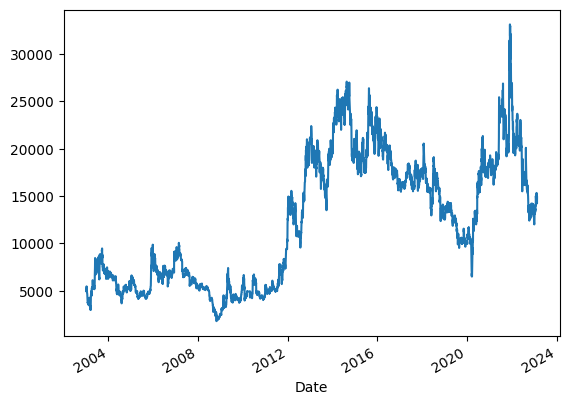

In [72]:
df['Close'].plot()

In [73]:
df['cum_ror'] = (1+ df['Change']).cumprod() - 1
df.head()

,Open,High,Low,Close,Volume,Change,cum_ror
Date,,,,,,,
2003-01-02,4798,5198,4748,5047,2921570,0.063198,0.063198
2003-01-03,5148,5398,5098,5147,5477860,0.019814,0.084264
2003-01-06,5198,5198,4998,5097,1962360,-0.009714,0.073731
2003-01-07,5248,5248,4948,4947,2133030,-0.029429,0.042132
2003-01-08,4948,5048,4848,4897,1858070,-0.010107,0.031599


In [74]:
누적수익률 = df['cum_ror'].iloc[-1]
start_date = df.index[0]
end_date = df.index[-1]
투자년도 = (end_date - start_date).days  / 365 # 날짜에서 날짜를 뺐기 때문에 252 X , 365 O

# 성과분석

- 연평균 복리 수익률(CAGR) 
- 최대낙폭(MDD)
- 변동성(Valaility)
- 샤프지수(Sharp ratio)

## 1. 연평균 복리 수익률(CAGR)

In [75]:
CAGR = (1+누적수익률) **(1/투자년도) - 1
CAGR

0.05834171941370303

## 2. MDD (최대낙폭)

In [76]:
df['Close']

Date
2003-01-02     5047
2003-01-03     5147
2003-01-06     5097
2003-01-07     4947
2003-01-08     4897
              ...  
2023-02-10    14700
2023-02-13    14520
2023-02-14    14820
2023-02-15    14220
2023-02-16    14870
Name: Close, Length: 4979, dtype: int64

많이 떨어졌을 때의 근거가 될 수 있다. 

<AxesSubplot: xlabel='Date'>

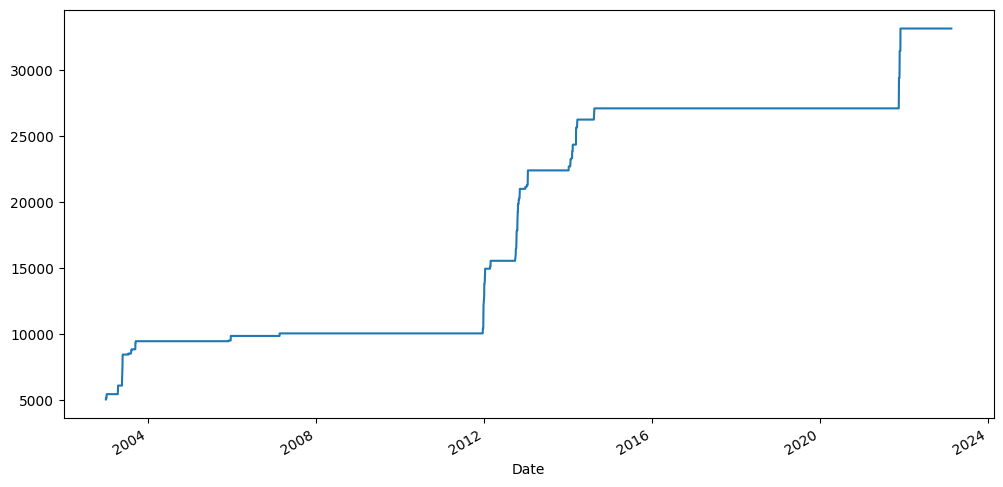

In [77]:
df['cum_max'] = df['Close'].cummax()  # 누적최대값
df['cum_max'].plot(figsize = (12, 6))

주식이 떨어질때는 선에서 유지


In [78]:
df['최대값에서하락률'] = (df['Close'] / df['cum_max']) -1
df.head()

,Open,High,Low,Close,Volume,Change,cum_ror,cum_max,최대값에서하락률
Date,,,,,,,,,
2003-01-02,4798,5198,4748,5047,2921570,0.063198,0.063198,5047,0.000000
2003-01-03,5148,5398,5098,5147,5477860,0.019814,0.084264,5147,0.000000
2003-01-06,5198,5198,4998,5097,1962360,-0.009714,0.073731,5147,-0.009714
2003-01-07,5248,5248,4948,4947,2133030,-0.029429,0.042132,5147,-0.038858
2003-01-08,4948,5048,4848,4897,1858070,-0.010107,0.031599,5147,-0.048572


<AxesSubplot: xlabel='Date'>

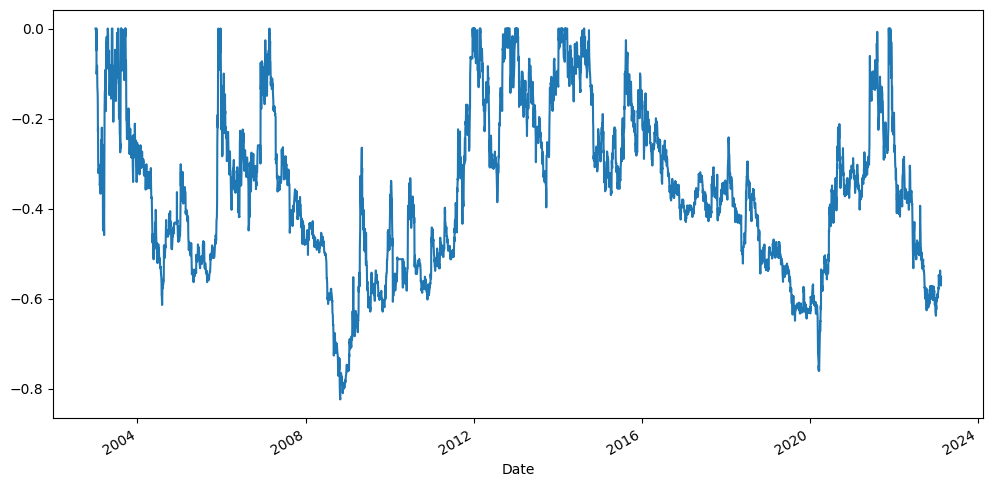

In [79]:
df['최대값에서하락률'].plot(figsize = (12, 6))

In [ ]:
df['MDD(최대하락률)'] = df['최대값에서하락률'].cummin()
df['MDD(최대하락률)'].plot()

In [ ]:
MDD = df['MDD(최대하락률)'].iloc[-1]
MDD

## 3. 변동성

In [ ]:
std = df['Change'].std()
std

In [ ]:
import numpy as np
VOL  = std *np.sqrt(252)
VOL

## 4. 샤프지수
- 샤프비율(sharp Ratio) = (포트폴리오 기대수익률) / 변동성(리스크)
- 샤프비율이 높을 수록 더 적은 위험으로 더 높은 수익률을 낼 수 있다.
- 샤프비율이 0이상이어어 투자대상, 1이상 경우 괜찮은 투자

In [ ]:
# sharp Ratio = (포트폴리오 기대수익률 - 무위험이자율) / 변동성(리스크)

In [ ]:
무위험이자율 = 0.035

In [ ]:
Sharp_Ratio = (CAGR - 무위험이자율) / VOL
Sharp_Ratio

In [ ]:
print(f'연복리수익률 : {round(CAGR * 100, 2)}%')
print(f'샤프지수 : {round(Sharp_Ratio * 100, 2)}%')
print(f'변동성 : {round(VOL * 100, 2)}%')
print(f'최대하락률 : {round(abs(MDD) * 100, 2)}%')

# 포트폴리오

In [ ]:
import FinanceDataReader as fdr

In [100]:
df_krx = fdr.StockListing('KRX')[['Code', 'Name']]
df_krx.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,051910,LG화학


In [153]:
cor_list = ['오리온', '한글과컴퓨터', '농심', '광동제약']

In [154]:
cor_df = df_krx[df_krx['Name'].isin(cor_list)]
cor_df 

,Code,Name
67,271560,오리온
142,004370,농심
530,030520,한글과컴퓨터
634,009290,광동제약


In [155]:
import pandas as pd

result = pd.DataFrame()
for idx, values in cor_df.iterrows():
    df = fdr.DataReader(values['Code'], '2018')
    df['Name'] = values['Name']
    result = pd.concat([result, df])
result

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,104500,107500,104500,107000,96061,0.023923,오리온
2018-01-03,105000,106500,103500,104000,75566,-0.028037,오리온
2018-01-04,105000,105000,100000,101000,135389,-0.028846,오리온
2018-01-05,101000,102000,98400,101500,102044,0.004950,오리온
2018-01-08,103000,104000,101500,103000,63501,0.014778,오리온
...,...,...,...,...,...,...,...
2023-02-10,6110,6120,6010,6040,69498,-0.011457,광동제약
2023-02-13,6040,6080,5950,6000,100645,-0.006623,광동제약
2023-02-14,6020,6030,5960,5970,80829,-0.005000,광동제약


In [156]:
# 변화율 데이터를 사용
# 피벗(Pivot) 테이블이란 많은 양의 데이터에서 필요한 자료만을 뽑아 새롭게 표를 작성해 주는 기능
Changes = pd.pivot_table(data = result, index = result.index, columns ='Name', values = 'Change')
Changes

Name,광동제약,농심,오리온,한글과컴퓨터
Date,,,,
2018-01-02,0.001143,0.012712,0.023923,-0.005571
2018-01-03,-0.007991,-0.027894,-0.028037,-0.028011
2018-01-04,-0.009206,-0.028694,-0.028846,-0.008646
2018-01-05,0.012776,-0.001477,0.004950,0.008721
2018-01-08,0.019495,-0.001479,0.014778,0.017291
...,...,...,...,...
2023-02-10,-0.011457,0.069069,0.004149,-0.023256
2023-02-13,-0.006623,-0.002809,0.005785,-0.012245
2023-02-14,-0.005000,0.007042,0.018899,0.020661


In [157]:
# 누적 수익률
cum_ror_df = (Changes + 1).cumprod() - 1
cum_ror = cum_ror_df.iloc[-1]
print(cum_ror)

Name
광동제약     -0.320000
농심        0.012712
오리온       0.191388
한글과컴퓨터   -0.171588
Name: 2023-02-16 00:00:00, dtype: float64


In [158]:
start_date = Changes.index[0]
end_date = Changes.index[-1]
year = (end_date - start_date).days / 365   # 365로 계산되니 365
print(year)

5.126027397260274


In [159]:
CAGR = (1+ cum_ror) ** (1/year) -1 
print(CAGR)

Name
광동제약     -0.072476
농심        0.002467
오리온       0.034753
한글과컴퓨터   -0.036057
Name: 2023-02-16 00:00:00, dtype: float64


In [160]:
daily_std = Changes.std()
annual_std = daily_std * np.sqrt(252)
print(annual_std, daily_std)

Name
광동제약      0.374015
농심        0.257307
오리온       0.361422
한글과컴퓨터    0.469777
dtype: float64 Name
광동제약      0.023561
농심        0.016209
오리온       0.022767
한글과컴퓨터    0.029593
dtype: float64


In [161]:
연평균수익률 = Changes.mean() * 252
공분산_일 = Changes.cov()
공분산_년 = Changes.cov() * 252
print(연평균수익률, 공분산_년)

Name
광동제약     -0.009531
농심        0.035407
오리온       0.100025
한글과컴퓨터    0.069402
dtype: float64 Name        광동제약        농심       오리온    한글과컴퓨터
Name                                          
광동제약    0.139887  0.018030  0.018508  0.052820
농심      0.018030  0.066207  0.031993  0.016462
오리온     0.018508  0.031993  0.130626  0.024804
한글과컴퓨터  0.052820  0.016462  0.024804  0.220691


In [162]:
sample_weight = [0.13765398, 0.144784,   0.31836518, 0.39919685] 
(CAGR * sample_weight).sum()

-0.012949108018636685

In [163]:
# 종목이 4개 -> 100% 
# 경우의 수가 많다.

# 전체 비중이 100%을 넘으면 안된다.
# 우리가 계산해야할 경우가 많다.

포트폴리오_비중_리스트 = []
포트폴리오_수익률_리스트 = []
포트폴리오_리스크_리스트 = []

import numpy as np

for i in range(20000):  # 20000번 한것중에서 가장 좋은 걸 가져오면 된다.
    # 포트폴리오의 비중
    weights = np.random.random(4)
    비중 = weights / weights.sum()  # 가져야할 비중
    # 포트폴리오의 수익률
    포트폴리오의_수익률 = (CAGR * 비중).sum()
    
    # 포트폴리오의 리스크
    리스크 = (annual_std * 비중).sum()
    포트폴리오_비중_리스트.append(비중)
    포트폴리오_수익률_리스트.append(포트폴리오의_수익률)
    포트폴리오_리스크_리스트.append(리스크)


In [164]:
# 각 종목을 데이터프레임에 넣습니다
포트폴리오 = pd.DataFrame(포트폴리오_비중_리스트)
포트폴리오.columns = Changes.columns
포트폴리오.head()


Name,광동제약,농심,오리온,한글과컴퓨터
0,0.076033,0.118717,0.009864,0.795387
1,0.014669,0.470847,0.078587,0.435898
2,0.219000,0.166061,0.353784,0.261155
3,0.117166,0.481747,0.363332,0.037754
4,0.191618,0.328092,0.067032,0.413258


In [165]:
포트폴리오['수익률'] = 포트폴리오_수익률_리스트
포트폴리오['리스크'] = 포트폴리오_리스크_리스트
포트폴리오.head()

Name,광동제약,농심,오리온,한글과컴퓨터,수익률,리스크
0,0.076033,0.118717,0.009864,0.795387,-0.033554,0.436204
1,0.014669,0.470847,0.078587,0.435898,-0.012888,0.359816
2,0.219000,0.166061,0.353784,0.261155,-0.012584,0.375188
3,0.117166,0.481747,0.363332,0.037754,0.003962,0.316831
4,0.191618,0.328092,0.067032,0.413258,-0.025649,0.374454


<AxesSubplot: xlabel='Risk', ylabel='ror'>

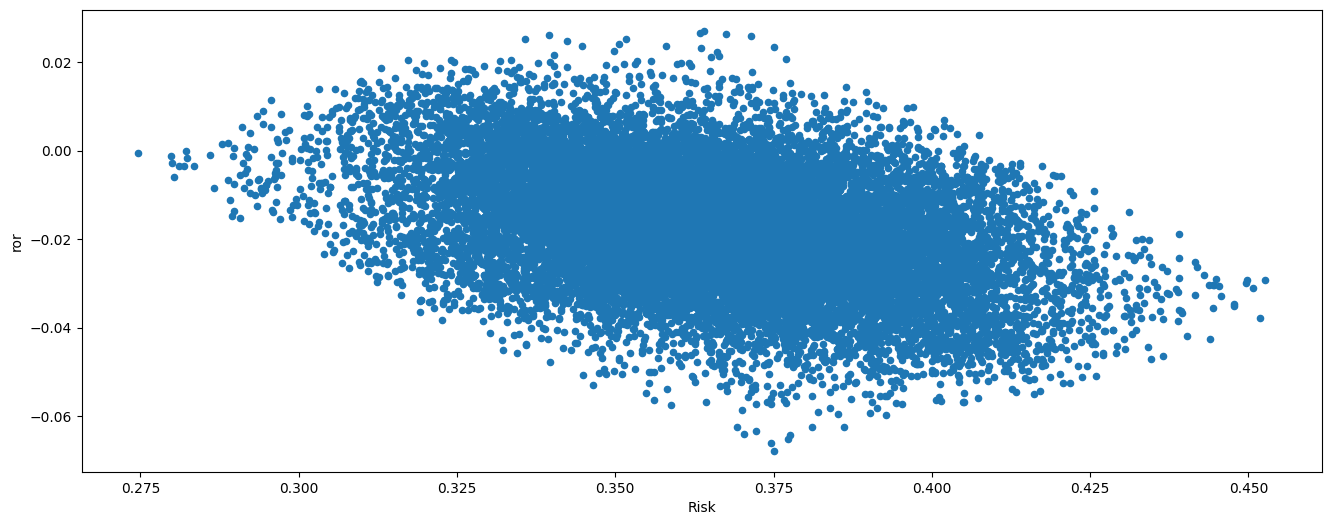

In [166]:
포트폴리오.plot.scatter(x = '리스크', y = '수익률', figsize = (16,6), xlabel = 'Risk' , ylabel= 'ror')


In [167]:
포트폴리오.sort_values('수익률', ascending = False)  # 수익률이 큰 측면에서 본 것

Name,광동제약,농심,오리온,한글과컴퓨터,수익률,리스크
14022,0.059092,0.000365,0.922599,0.017944,0.027134,0.364073
12876,0.011204,0.057669,0.858252,0.072875,0.026529,0.363455
19791,0.017384,0.026309,0.876991,0.079316,0.026423,0.367496
19729,0.009899,0.218700,0.764671,0.006730,0.026154,0.339506
13893,0.019604,0.003472,0.883135,0.093790,0.025897,0.371470
...,...,...,...,...,...,...
14856,0.878984,0.060516,0.022777,0.037723,-0.064124,0.370278
5851,0.861434,0.031493,0.027380,0.079693,-0.064277,0.377626
13528,0.902887,0.001526,0.053095,0.042491,-0.065120,0.377237
3659,0.915818,0.016718,0.036619,0.030845,-0.066173,0.374557


In [168]:
포트폴리오.sort_values('리스크', ascending = False)  # 리스크가 큰 측면에서 본 것

Name,광동제약,농심,오리온,한글과컴퓨터,수익률,리스크
3771,0.038253,0.006291,0.111789,0.843667,-0.029292,0.452664
2866,0.124482,0.011501,0.032487,0.831530,-0.037847,0.451893
16853,0.006903,0.067552,0.036795,0.888750,-0.031101,0.450776
4345,0.002787,0.059110,0.066671,0.871432,-0.029160,0.449727
2321,0.044662,0.025467,0.096905,0.832966,-0.029841,0.449589
...,...,...,...,...,...,...
17005,0.110293,0.796770,0.081958,0.010979,-0.003575,0.281045
7578,0.089527,0.846632,0.009554,0.054287,-0.006025,0.280285
14869,0.105558,0.799227,0.090641,0.004574,-0.002693,0.280036
8865,0.018830,0.871252,0.027991,0.081926,-0.001196,0.279826


In [169]:
포트폴리오[포트폴리오['리스크'] > 0.3]  # 이런식으로 각자에 맞춰서 선택이 가능 할 것이다.

Name,광동제약,농심,오리온,한글과컴퓨터,수익률,리스크
0,0.076033,0.118717,0.009864,0.795387,-0.033554,0.436204
1,0.014669,0.470847,0.078587,0.435898,-0.012888,0.359816
2,0.219000,0.166061,0.353784,0.261155,-0.012584,0.375188
3,0.117166,0.481747,0.363332,0.037754,0.003962,0.316831
4,0.191618,0.328092,0.067032,0.413258,-0.025649,0.374454
...,...,...,...,...,...,...
19995,0.426331,0.277464,0.128029,0.168175,-0.031829,0.356125
19996,0.258130,0.290761,0.120409,0.330701,-0.025730,0.370233
19997,0.126941,0.343014,0.320595,0.209451,-0.004764,0.350003
19998,0.198256,0.287877,0.419080,0.094787,-0.002512,0.344217


In [170]:
포트폴리오['샤프지수'] = 포트폴리오['수익률'] / 포트폴리오['리스크']
포트폴리오.head()

Name,광동제약,농심,오리온,한글과컴퓨터,수익률,리스크,샤프지수
0,0.076033,0.118717,0.009864,0.795387,-0.033554,0.436204,-0.076923
1,0.014669,0.470847,0.078587,0.435898,-0.012888,0.359816,-0.035817
2,0.219000,0.166061,0.353784,0.261155,-0.012584,0.375188,-0.033540
3,0.117166,0.481747,0.363332,0.037754,0.003962,0.316831,0.012507
4,0.191618,0.328092,0.067032,0.413258,-0.025649,0.374454,-0.068498


In [171]:
포트폴리오.sort_values('샤프지수', ascending = False)

Name,광동제약,농심,오리온,한글과컴퓨터,수익률,리스크,샤프지수
19729,0.009899,0.218700,0.764671,0.006730,0.026154,0.339506,0.077036
7426,0.012037,0.250768,0.734558,0.002637,0.025179,0.335751,0.074994
14022,0.059092,0.000365,0.922599,0.017944,0.027134,0.364073,0.074529
12876,0.011204,0.057669,0.858252,0.072875,0.026529,0.363455,0.072992
12040,0.013641,0.209038,0.753029,0.024292,0.024821,0.342462,0.072478
...,...,...,...,...,...,...,...
135,0.840341,0.080078,0.001107,0.078474,-0.063498,0.372170,-0.170615
13528,0.902887,0.001526,0.053095,0.042491,-0.065120,0.377237,-0.172624
14856,0.878984,0.060516,0.022777,0.037723,-0.064124,0.370278,-0.173178
3659,0.915818,0.016718,0.036619,0.030845,-0.066173,0.374557,-0.176669


# 투자전략(자동매매, 백테스팅)

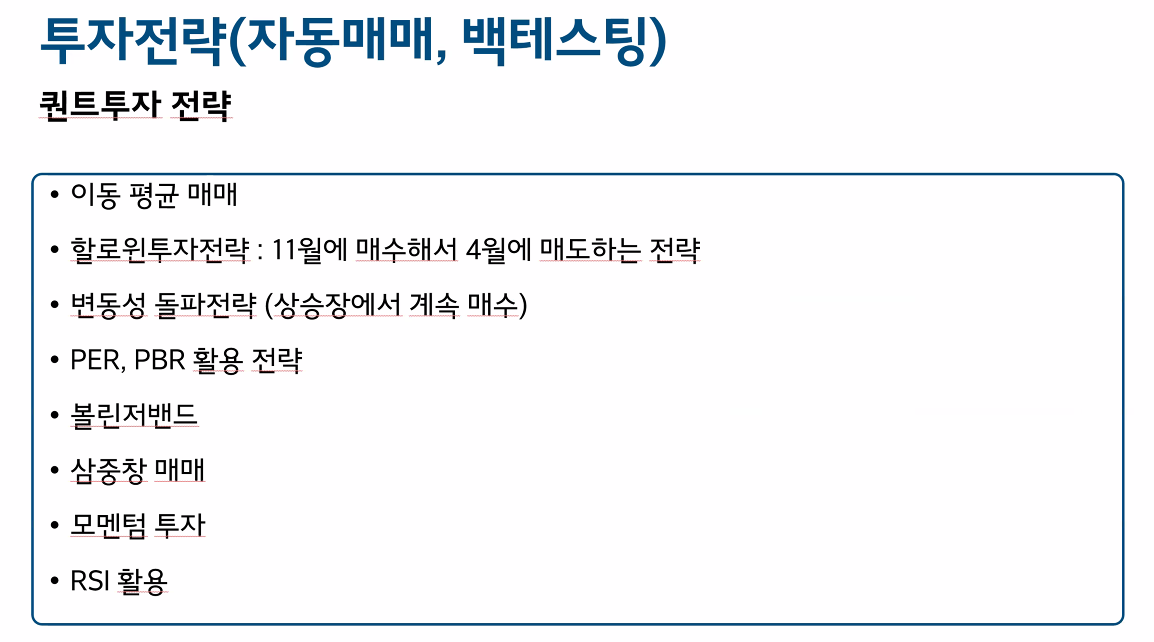